# Agrupamento Hierárquico

Nâo é muito grande com datasets muito grandes, mas, em questão de visualização, é bom por poder visualizar no dendograma

Recomendações de Livros

````
Capítulo Hiearquical Cluster do livro Machine Learning Algorithms de Giuseppe Bonaccorso: mais detalhes sobre a teoria desta técnica

Abaixo você tem alguns links complementares com artigos sobre o assunto:
````

https://uc-r.github.io/hc_clustering

http://www.econ.upf.edu/~michael/stanford/maeb7.pdf

https://towardsdatascience.com/hierarchical-clustering-and-its-applications-41c1ad4441a6

## Exemplo de Agrupamento Hierárquico

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# Dados para fazer processamento
x = [20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48]  
y = [1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]

# numpy.array
base = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                 [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                 [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

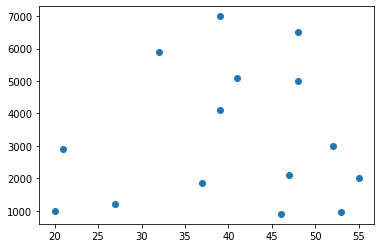

In [3]:
# Plotando Gráfico
plt.scatter(x,y)

In [4]:
# Escalonamento
scaler = StandardScaler()
base = scaler.fit_transform(base)

In [5]:
base

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [6]:
base.shape

(15, 2)

### Plotando dendograma

Há outros métodos de acrodo com o `linkage`. 

Os outros métodos estâo no link abaixo:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

Text(0, 0.5, 'Distância Euclidiana')

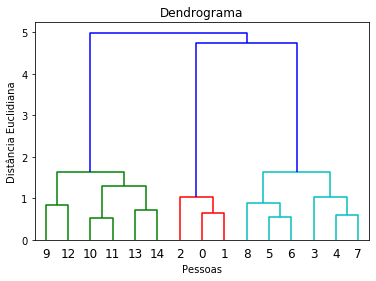

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendrograma = dendrogram(linkage(base, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')

### Classificador `AgglomerativeClustering`

parametros do classificador

link: 

`affinity` :: str or callable, default=’euclidean’.

Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

`linkage`

inkage{“ward”, “complete”, “average”, “single”}, default=”ward”.

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

+ ward minimizes the variance of the clusters being merged.

+ average uses the average of the distances of each observation of the two sets.

+ complete or maximum linkage uses the maximum distances between all observations of the two sets.

+ single uses the minimum of the distances between all observations of the two sets.

---

Em geral, linkage = `ward` é o melhor.

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(base)

In [9]:
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [10]:
previsoes

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

### Plotando Gráfico de Agrupamento

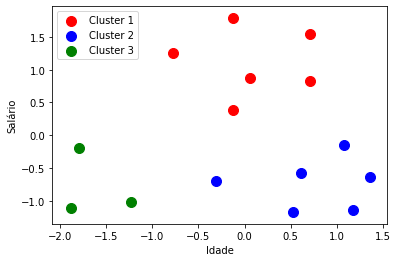

In [11]:
plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(base[previsoes == 2, 0], base[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.legend()

## Base de crédito

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

file_path = "../../files/"

In [3]:
base = pd.read_csv(file_path + 'credit_card_clients.csv', header = 1)
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [4]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339


### PréProcessamento e Escalonamento

In [5]:
X = base.iloc[:,[1,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# DENDOGRAMA DÁ ERRO PORQUE SÃO MUITO DADOS PARA PLOTAR O GRÁFICO
dendrograma = dendrogram(linkage(X, method = 'ward'))

### Classificador `AgglomerativeCLustering`

In [6]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [15]:
X = X[:3000]

In [17]:
# Ta dando Erro, entâo diminui a base na celula anterior
previsoes = hc.fit_predict(X)

In [18]:
previsoes

array([1, 1, 1, ..., 1, 1, 1])

### Plotando Gráfico de Grupos

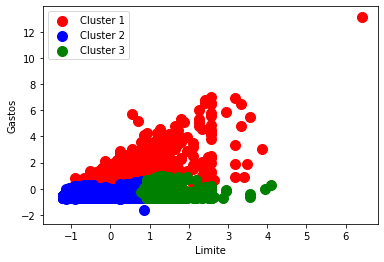

In [20]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()

A partir dos clusters você pode fazer uma análisedo resultado.

**LEMBRE-SE, OS CLUSTERS FORAM FEITOS PELO ALGORITMO,MAS, O SIGNIFICADO DESSA SEGMENTAÇÂO DEVE SER FEITO PELO ANALISTA**

---

No exemplo acima tempos que:

CLUSTER 1: Altos Gastos

CLUSTER 2: Baixos gastos e pouco limite

CLUSTER 3: Baixo gastos e muito limite

Assim, sabendo dessa segmentaçâo, para o BI, pode-se fazer um tratamento diferente para cada grupo




## English ML-AZ

In [24]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
# Importing the dataset
dataset = pd.read_csv(file_path + 'Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
# y = dataset.iloc[:, 3].values

In [29]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


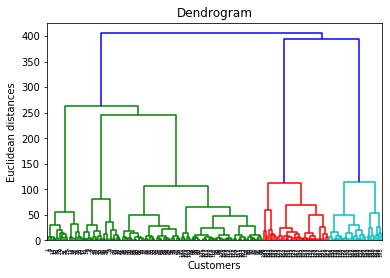

In [31]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [27]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

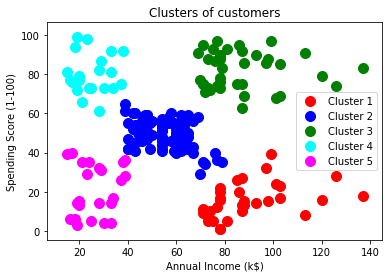

In [28]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Questions English ML-AZ Hierarchical Clustering

### Hierarchical Clustering Intuition

What is the point of Hierarchical Clustering if it always leads to one cluster per observation
point?

The main point of Hierarchical Clustering is to make the dendrogram, because you need to start with one
single cluster, then work your way down to see the different combinations of clusters until having a number
of clusters equal to the number of observations. And it’s the dendrogram itself that allows to find the best
clustering configuration.

When you are comparing the distance between two clusters or a cluster and a point, how
exactly is it measured? Are you taking the centroid in the cluster and measuring the distance?

Exactly, the metric is the euclidean distance between the centroid of the first cluster and the point, (or the
centroid of the other cluster for the distance between two clusters).

Do we also need to perform feature scaling for Hierarchical Clustering?

Yes because the equations of the clustering problems involve the Euclidean Distance. Anytime the model
equations involve the Euclidean Distance, you should apply feature scaling.

### Hierarchical Clustering in Python

Should we use the dendrogram or the elbow method to find that optimal number of clusters?

You should use both (it’s faster to try both than you think thanks to the templates), just to double check
that optimal number. However if you really only have time for one, I would recommend the elbow method.
The dendrogram is not always the easiest way to find the optimal number of clusters. But with the elbow
method it’s very easy, since the elbow is most of the time very obvious to spot.

Could you expand on how the clusters are formed through the ward method of the Agglom-
erativeClustering() Python class?

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or
splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root
of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one
sample. The AgglomerativeClustering() class performs a hierarchical clustering using a bottom up approach:
each observation starts in its own cluster, and clusters are successively merged together. The ward method
minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this
sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

I thought that dendrograms were like the memory of the HC algorithm. If so, why do we first
make the dendrogram and then apply the agglomerative clustering? Does that mean that we
execute twice the clustering algorithm?

The only purpose of making first the dendrogram is to have an idea of the optimal number of clusters.
It’s like the memory or the history of the HC algorithm. But through that history/memory we can see
the optimal number of clusters. And that’s what we do in this step. Then when we apply agglomerative
clustering, we can input the optimal number of clusters that we found thanks to the dendrogram.

What is ’affinity’ in the AgglomerativeClustering() class?

’affinity’ refers to the distance used in the K-Means algorithm, which is the Euclidean distance (the most
classic one, the geometrical one). It refers to how the HC algorithm defines (finds) the closest centroids to
each point. And then what goes along with it is the ward method used to build the clusters, meaning that
we use the Within Cluster Sum of Squares as a criterion to gather and form our clusters.

Why don’t we simply implement some code that automatically finds the optimal number of
clusters, instead of selecting it manually or visually?

Because the choice of the optimal number of clusters is also influenced by the business problem (goals and
constraints). For example, some business problems have a minimum or maximum number of clusters, or a
min/max number of elements per cluster. Such constraints require us to have several options, and the best
way to figure out the best options are by looking at the graphs (dendrogram or elbow).